In [1]:
%matplotlib inline
from set_gpu import *
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction = 0.33)
config = tf.ConfigProto(gpu_options=gpu_options)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/MNIST_data/', one_hot=True)

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
model_path = "models/mnist-shallow/model2.ckpt"

hidden_units = 1024
x = tf.placeholder(tf.float32, [None, 784], name='x')
y_ = tf.placeholder(tf.float32, [None, 10], name='y_')
weights = {
    'h1': tf.Variable(tf.random_normal([784, hidden_units], stddev=tf.sqrt(2/(784+hidden_units)), mean=0)),
    'h2': tf.Variable(tf.random_normal([hidden_units, hidden_units], stddev=tf.sqrt(1/hidden_units), mean=0)),
    'h3': tf.Variable(tf.random_normal([hidden_units, hidden_units], stddev=tf.sqrt(1/hidden_units), mean=0)),
    'h4': tf.Variable(tf.random_normal([hidden_units, hidden_units], stddev=tf.sqrt(1/hidden_units), mean=0)),
    'h5': tf.Variable(tf.random_normal([hidden_units, hidden_units], stddev=tf.sqrt(1/hidden_units), mean=0)),
    'y': tf.Variable(tf.random_normal([hidden_units, 10], stddev=tf.sqrt(2/(hidden_units+10)), mean=0))
} # xavier init
biases = {
    'b1': tf.Variable(tf.zeros([hidden_units])),
    'b2': tf.Variable(tf.zeros([hidden_units])),
    'b3': tf.Variable(tf.zeros([hidden_units])),
    'b4': tf.Variable(tf.zeros([hidden_units])),
    'b5': tf.Variable(tf.zeros([hidden_units])),
    'y': tf.Variable(tf.zeros([10]))
}

# for batch norm
epsilon = 1e-3 # a small float to avoid div by 0
scale = tf.ones([hidden_units])
beta = tf.zeros([hidden_units]) # offset

In [4]:
# linear combination -> batch_norm -> activation -> dropout

hidden_1 = tf.nn.relu(tf.matmul(x, weights['h1']) + biases['b1'])
#batch_mean, batch_var = tf.nn.moments(hidden_1, [0])
#batch_norm_1 = tf.nn.batch_normalization(hidden_1, batch_mean, batch_var, None, None, epsilon)
#dropout_1 = tf.nn.dropout(tf.nn.relu(batch_norm_1), .4)    

hidden_2 = tf.nn.relu(tf.matmul(hidden_1, weights['h2']) + biases['b2'])
#batch_mean, batch_var = tf.nn.moments(hidden_2, [0])
#batch_norm_2 = tf.nn.batch_normalization(hidden_2, batch_mean, batch_var, None, None, epsilon)
#dropout_2 = tf.nn.dropout(tf.nn.relu(batch_norm_2), .4) 

hidden_3 = tf.nn.relu(tf.matmul(hidden_2, weights['h3']) + biases['b3'])
#batch_mean, batch_var = tf.nn.moments(hidden_3, [0])
#batch_norm_3 = tf.nn.batch_normalization(hidden_3, batch_mean, batch_var, None, None, epsilon)
#dropout_3 = tf.nn.dropout(tf.nn.relu(batch_norm_3), .4) 

hidden_4 = tf.nn.relu(tf.matmul(hidden_3, weights['h4']) + biases['b4'])
#batch_mean, batch_var = tf.nn.moments(hidden_4, [0])
#batch_norm_4 = tf.nn.batch_normalization(hidden_4, batch_mean, batch_var, None, None, epsilon)
#dropout_4 = tf.nn.dropout(tf.nn.relu(batch_norm_4), .4) 

hidden_5 = tf.nn.relu(tf.matmul(hidden_4, weights['h5']) + biases['b5'])
#batch_mean, batch_var = tf.nn.moments(hidden_5, [0])
#batch_norm_5 = tf.nn.batch_normalization(hidden_5, batch_mean, batch_var, None, None, epsilon)
#dropout_5 = tf.nn.dropout(tf.nn.relu(batch_norm_5), .4) 

y = tf.matmul(hidden_5, weights['y']) + biases['y']

In [5]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))
train_step = tf.train.AdamOptimizer(.0001).minimize(cross_entropy)

In [6]:
init = tf.global_variables_initializer()

In [7]:
saver = tf.train.Saver()

In [8]:
sess = tf.Session(config=config)
sess.run(init)

In [9]:
def train(mnist, sess, train_step, cross_entropy):
    i = 550
    epochs = 50
    display_step = 1

    for epoch in range(epochs):
        avg_cost = 0
        for _ in range(i):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            _, cost = sess.run([train_step, cross_entropy], feed_dict={'x:0': batch_xs, 'y_:0': batch_ys})
            avg_cost += cost/i
        if epoch%display_step==0:
            print("Epoch:", '%02d'%(epoch+1), "\tcost={:.9f}".format(avg_cost))

In [10]:
train(mnist, sess, train_step, cross_entropy)

Epoch: 01 	cost=0.308368597
Epoch: 02 	cost=0.106483603
Epoch: 03 	cost=0.063942520
Epoch: 04 	cost=0.043310779
Epoch: 05 	cost=0.026464633
Epoch: 06 	cost=0.020937722
Epoch: 07 	cost=0.015892280
Epoch: 08 	cost=0.014206792
Epoch: 09 	cost=0.012484210
Epoch: 10 	cost=0.010099572
Epoch: 11 	cost=0.009442633
Epoch: 12 	cost=0.008417426
Epoch: 13 	cost=0.008848761
Epoch: 14 	cost=0.009141778
Epoch: 15 	cost=0.006326413
Epoch: 16 	cost=0.007700397
Epoch: 17 	cost=0.006042477
Epoch: 18 	cost=0.003816723
Epoch: 19 	cost=0.006768847
Epoch: 20 	cost=0.006009979
Epoch: 21 	cost=0.004338271
Epoch: 22 	cost=0.006527691
Epoch: 23 	cost=0.006689064
Epoch: 24 	cost=0.005155070
Epoch: 25 	cost=0.001628125
Epoch: 26 	cost=0.003433253
Epoch: 27 	cost=0.007206303
Epoch: 28 	cost=0.004532520
Epoch: 29 	cost=0.003091856
Epoch: 30 	cost=0.006097249
Epoch: 31 	cost=0.005629592
Epoch: 32 	cost=0.003196812
Epoch: 33 	cost=0.000712070
Epoch: 34 	cost=0.000030185
Epoch: 35 	cost=0.000014389
Epoch: 36 	cost=0.00

In [11]:
def test(y, y_, mnist):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = 100*tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return sess.run(accuracy, feed_dict={'x:0': mnist.test.images, 'y_:0': mnist.test.labels})

In [12]:
print('Accuracy = {:.2f}%'.format(test(y, y_, mnist)))

Accuracy = 98.63%


In [11]:
save_path = saver.save(sess, model_path)

In [9]:
saver.restore(sess, model_path)

INFO:tensorflow:Restoring parameters from models/mnist-shallow/model2.ckpt


In [13]:
svd = {'s':[], 'u':[], 'v':[]}

for layer in weights:
    if layer!='y':
        s, u, v = tf.svd(weights[layer])
        svd['s'].append(s)
        svd['u'].append(u)
        svd['v'].append(v)

In [14]:
d = [10, 20, 50, 100, 200, 1024]
accuracies = []

for dval in d:
    if dval==1024:
        hidden1_svd = tf.nn.relu(tf.add(tf.matmul(x, tf.matmul(tf.matmul(svd['u'][0][:,:784], tf.diag(svd['s'][0])[:784,:784]), 
                                              tf.transpose(svd['v'][0][:,:784]))), biases['b1']))  
    else:
        hidden1_svd = tf.nn.relu(tf.add(tf.matmul(x, tf.matmul(tf.matmul(svd['u'][0][:,:dval], tf.diag(svd['s'][0])[:dval,:dval]), 
                                              tf.transpose(svd['v'][0][:,:dval]))), biases['b1']))  

    hidden2_svd = tf.nn.relu(tf.add(tf.matmul(hidden1_svd, tf.matmul(tf.matmul(svd['u'][1][:,:dval], tf.diag(svd['s'][1])[:dval,:dval]), 
                                              tf.transpose(svd['v'][1][:,:dval]))), biases['b2']))

    hidden3_svd = tf.nn.relu(tf.add(tf.matmul(hidden2_svd, tf.matmul(tf.matmul(svd['u'][2][:,:dval], tf.diag(svd['s'][2])[:dval,:dval]), 
                                              tf.transpose(svd['v'][2][:,:dval]))), biases['b3']))

    hidden4_svd = tf.nn.relu(tf.add(tf.matmul(hidden3_svd, tf.matmul(tf.matmul(svd['u'][3][:,:dval], tf.diag(svd['s'][3])[:dval,:dval]), 
                                              tf.transpose(svd['v'][3][:,:dval]))), biases['b4']))

    hidden5_svd = tf.nn.relu(tf.add(tf.matmul(hidden4_svd, tf.matmul(tf.matmul(svd['u'][4][:,:dval], tf.diag(svd['s'][4])[:dval,:dval]), 
                                              tf.transpose(svd['v'][4][:,:dval]))), biases['b5']))

    y_svd = tf.nn.softmax(tf.add(tf.matmul(hidden5_svd, weights['y']), biases['y']))
    
    
    accuracies.append(test(y_svd, y_, mnist))
    
    if dval==1024:
        print('full done')
    else:
        print(dval,"done")

10 done
20 done
50 done
100 done
200 done
full done


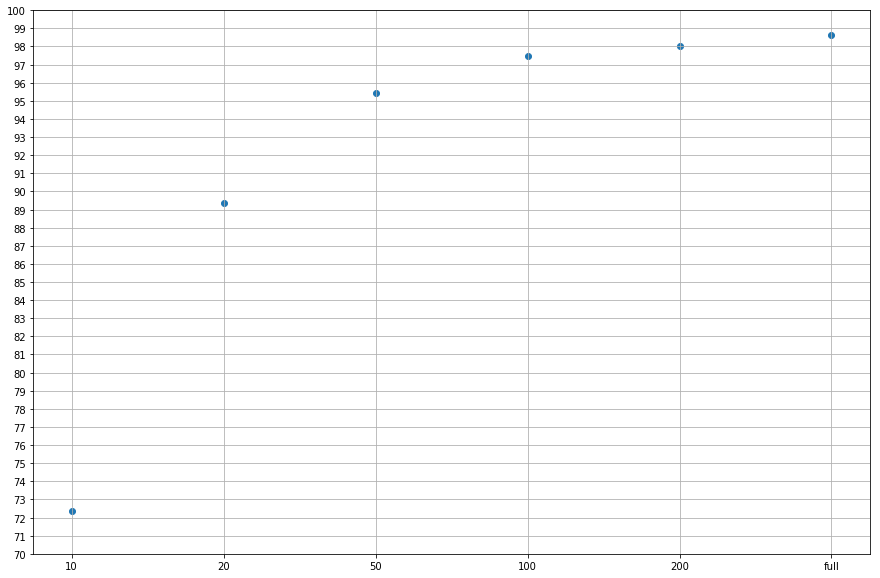

In [61]:
plt.figure(figsize=(15, 10))
plt.scatter(np.arange(6), accuracies)
plt.xticks(np.arange(6), [str(val) for val in d[:-1]]+['full'])
plt.yticks(np.arange(70, 101, 1))
plt.grid(True)
plt.show()

In [25]:
svd_20_path = "models/mnist-shallow/svd_20.ckpt"

In [16]:
keys = []

for i in range(5):
    keys.append('{}_u'.format(i+1))
    keys.append('{}_v'.format(i+1))
keys.append('y')

In [17]:
# store global variables that have been initialized till now
initialized = set(tf.global_variables())

In [18]:
weights_20 = {}
biases_20 = {}
 
for key in keys[:-1]:
    layer = int(key[0])-1
    svd_mat = key[-1]
    
    if svd_mat=='u':
        weights_20['h'+key] =  tf.Variable(sess.run(svd['u'][layer][:,:20]))
        biases_20['b'+key] = tf.Variable(tf.zeros([20]))
    else:
        weights_20['h'+key] = tf.Variable(sess.run(tf.matmul(
            tf.diag(svd['s'][layer])[:20,:20], 
            tf.transpose(svd['v'][layer][:,:20])
        )))
        biases_20['b'+key] = tf.Variable(tf.zeros([hidden_units]))
        
weights_20['y'] = tf.Variable(sess.run(weights['y']))
biases_20['y'] = tf.Variable(tf.zeros([10]))

In [19]:
hidden1_u = tf.nn.relu(tf.matmul(x, weights_20['h1_u']) + biases_20['b1_u'])
hidden1_v = tf.nn.relu(tf.matmul(hidden1_u, weights_20['h1_v']) + biases_20['b1_v'])

hidden2_u = tf.nn.relu(tf.matmul(hidden1_v, weights_20['h2_u']) + biases_20['b2_u'])
hidden2_v = tf.nn.relu(tf.matmul(hidden2_u, weights_20['h2_v']) + biases_20['b2_v'])

hidden3_u = tf.nn.relu(tf.matmul(hidden2_v, weights_20['h3_u']) + biases_20['b3_u'])
hidden3_v = tf.nn.relu(tf.matmul(hidden3_u, weights_20['h3_v']) + biases_20['b3_v'])

hidden4_u = tf.nn.relu(tf.matmul(hidden3_v, weights_20['h4_u']) + biases_20['b4_u'])
hidden4_v = tf.nn.relu(tf.matmul(hidden4_u, weights_20['h4_v']) + biases_20['b4_v'])

hidden5_u = tf.nn.relu(tf.matmul(hidden4_v, weights_20['h5_u']) + biases_20['b5_u'])
hidden5_v = tf.nn.relu(tf.matmul(hidden5_u, weights_20['h5_v']) + biases_20['b5_v'])

y_20 = tf.matmul(hidden5_v, weights_20['y']) + biases_20['y']

In [20]:
cross_entropy_20 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_20, labels=y_))
train_step_20 = tf.train.AdamOptimizer().minimize(cross_entropy_20)

In [21]:
# init only new variables 
sess.run(tf.variables_initializer(set(tf.global_variables()) - initialized))

In [22]:
train(mnist, sess, train_step_20, cross_entropy_20)

Epoch: 01 	cost=0.366448314
Epoch: 02 	cost=0.150045500
Epoch: 03 	cost=0.122763306
Epoch: 04 	cost=0.110178737
Epoch: 05 	cost=0.092656376
Epoch: 06 	cost=0.092163173
Epoch: 07 	cost=0.081235577
Epoch: 08 	cost=0.076495924
Epoch: 09 	cost=0.072574030
Epoch: 10 	cost=0.067482711
Epoch: 11 	cost=0.059226819
Epoch: 12 	cost=0.060882854
Epoch: 13 	cost=0.060411546
Epoch: 14 	cost=0.054420219
Epoch: 15 	cost=0.051186647
Epoch: 16 	cost=0.047151393
Epoch: 17 	cost=0.049137877
Epoch: 18 	cost=0.045952117
Epoch: 19 	cost=0.043432888
Epoch: 20 	cost=0.043275801
Epoch: 21 	cost=0.039793251
Epoch: 22 	cost=0.040172850
Epoch: 23 	cost=0.035581557
Epoch: 24 	cost=0.036790111
Epoch: 25 	cost=0.035857802
Epoch: 26 	cost=0.032667134
Epoch: 27 	cost=0.033819291
Epoch: 28 	cost=0.034217128
Epoch: 29 	cost=0.032885397
Epoch: 30 	cost=0.030707486
Epoch: 31 	cost=0.028713997
Epoch: 32 	cost=0.028142446
Epoch: 33 	cost=0.034590628
Epoch: 34 	cost=0.029603418
Epoch: 35 	cost=0.029549217
Epoch: 36 	cost=0.03

In [26]:
save_path_20 = saver.save(sess, svd_20_path)

In [ ]:
saver.restore(sess, svd_20_path)

In [23]:
print('Accuracy = {:.2f}%'.format(test(y_20, y_, mnist)))

Accuracy = 97.58%


In [ ]:
sess.close()